In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random

In [2]:
!python3 '/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/main_generate_json_files.py'

Starting script...
Removing existing file...
Ending script...


In [3]:
data = pd.read_json(r'/Users/leosilva/development/thesis/workspacePyCharm/TwitterDataMining/alldata.json')
data.head()

,26,27,28,29,30,31,32,33,34,35
id_str_twitter,23781146,15148309,927028057763995648,77648005,3429765093,10794662,1034514325644431361,529445600,12050562,62314491
name,Fe Rebelatto,Sommelier de Airbnb,✪ Felippe,Conference Distinguished Specialist,Paula Santana,Maharaja of the Legacies,Jessica,"var nickname = ""Riquettinha"";",Roberta Arcoverde,Gabriela
screen_name,rebelatto,Guilh_rm_,FelippeRegazio,NannoKa,psanrosa13,rponte,dev_jessi,Riquettinha,rla4,Gabrielathalita
location,"Rio de Janeiro, Brasil",somewhere in Brazil,,Ctba-PR Brasil,Brasil,"Ceará, Brazil",São Paulo - Brasil,"Belo Horizonte, Brasil","Sao Paulo, Brazil",Belo Horizonte
url,None,https://t.co/gX4oRZWHg3,https://t.co/KkaPlVH4Wu,https://t.co/hDni4Fh2Ng,https://t.co/YJQuDtv2YW,https://t.co/3yZ94QNQvs,https://t.co/MtUeSEBICu,https://t.co/QU71LJgSuD,None,https://t.co/AmkOKWlftK


In [4]:
def create_tweets_pd(data, id_user):

    tweets_by_month = {}

    tweets_pd = pd.DataFrame(data[id_user]['tweets'])
    del tweets_pd[0]
    del tweets_pd[1]
    del tweets_pd[4]
    del tweets_pd[5]
    del tweets_pd[6]
    del tweets_pd[18]
    
    tweets_pd.columns = ["text", "created_at", "id_user", "vader_sentiment_analysis_score", "vader_sentiment_analysis_polarity",
                         "oplexicon_sentiment_analysis_score", "oplexicon_sentiment_analysis_polarity",
                         "sentistrength_sentiment_analysis_score", "sentistrength_sentiment_analysis_polarity",
                         "sentilexpt_sentiment_analysis_score", "sentilexpt_sentiment_analysis_polarity",
                         "final_score", "final_polarity"]
 
    return tweets_pd

In [5]:
def create_line_plot(df_result, id_user):
    df_result["created_at"] = pd.to_datetime(df_result["created_at"])
    df_result['date_minus_time'] = df_result["created_at"].apply( lambda df_result : datetime.datetime(year=df_result.year, month=df_result.month, day=df_result.day))
    df_result.set_index(df_result["date_minus_time"],inplace=True)

    new_df = pd.DataFrame(df_result['final_score'].resample('W').mean())

    new_df['week'] = range(1, len(new_df.index) + 1)

    x = new_df["week"]
    y = new_df["final_score"]

    tickvalues = range(0, int(len(x)), 2)

    if len(tickvalues) > len(x[1::2]):
        tickvalues = range(0, int(len(x)) - (len(tickvalues) - len(x[1::2])), 2)

    fig = plt.figure(figsize=(16,6))

    plt.xticks(ticks = tickvalues ,labels = x[1::2], rotation = 'vertical')

    plt.title("Tweets polarity per week - Participant {}".format(id_user))
    plt.ylabel("Polarity")
    plt.xlabel("Weeks")

    plt.axhline(y.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(y.mean()*0.05, max_ylim*0.12, 'Mean: {:.2f}'.format(y.mean()))

    plt.plot(x,y)

DataError: No numeric types to aggregate

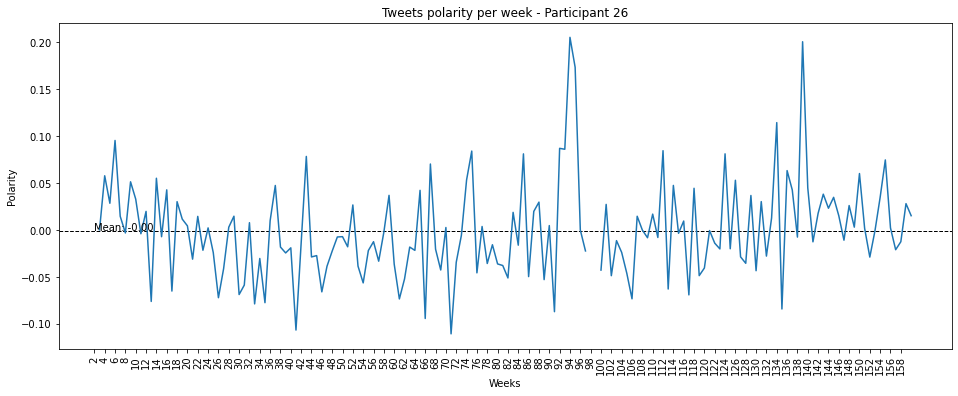

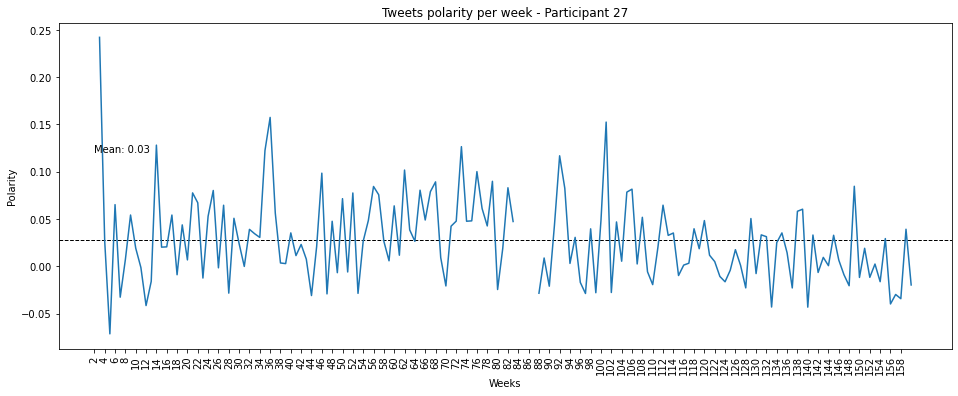

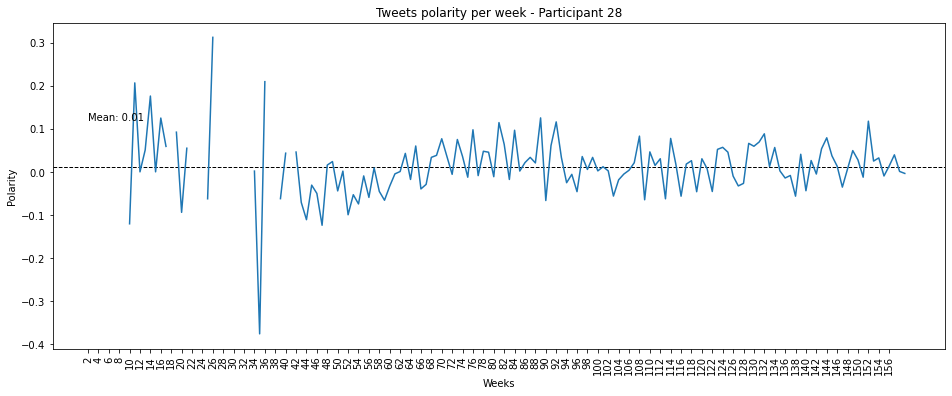

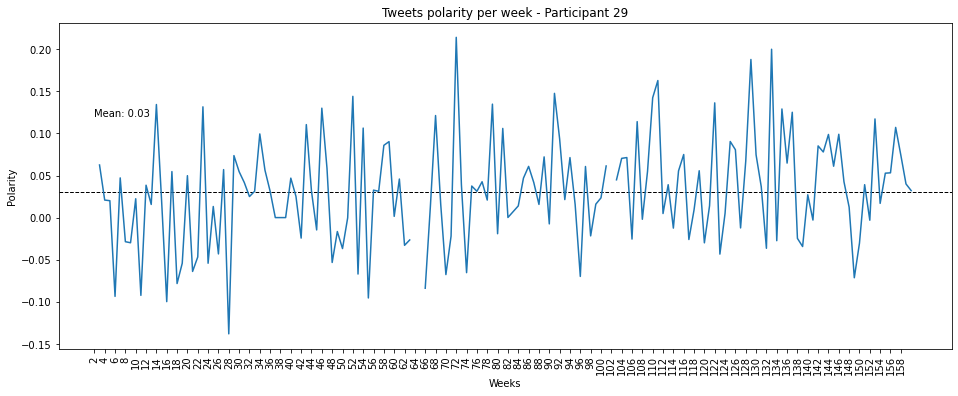

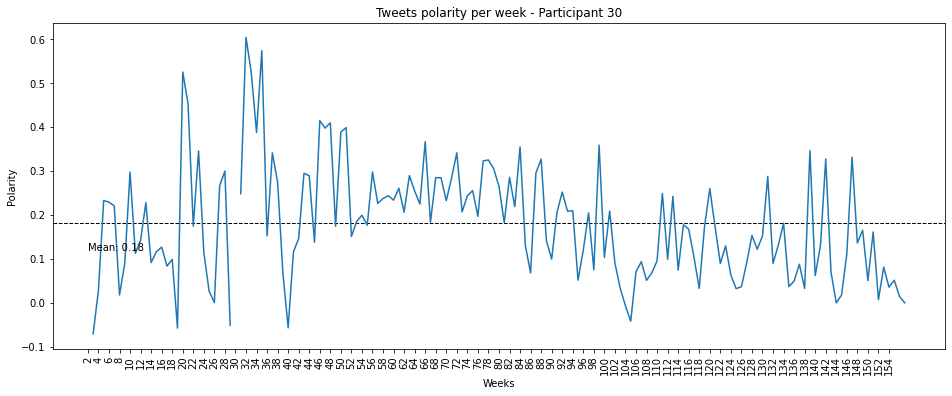

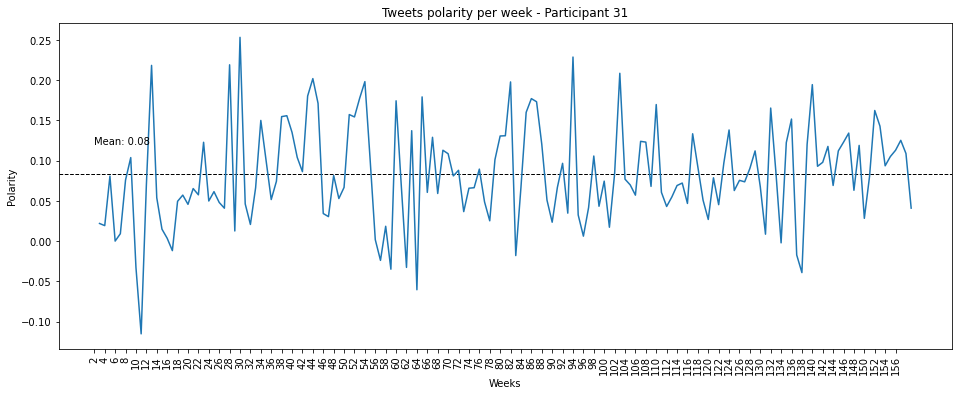

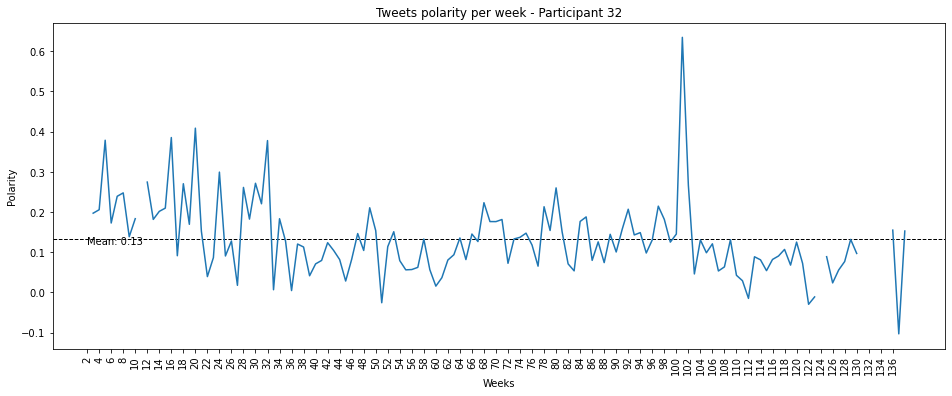

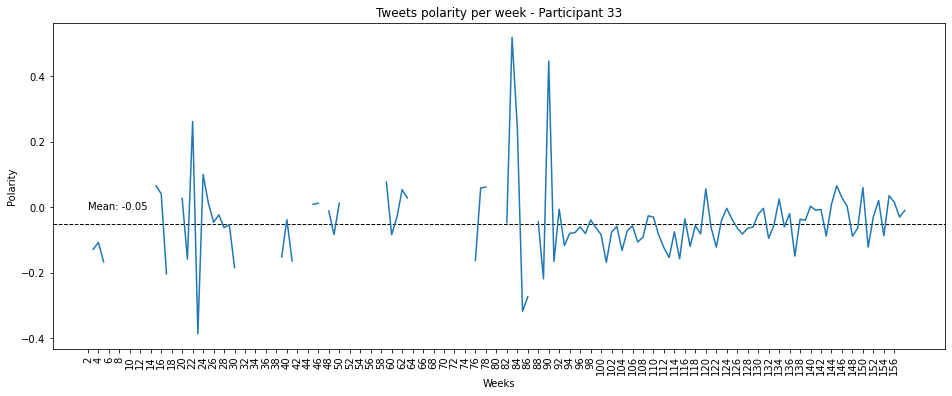

In [6]:
for c in data:
    id_user = c
    tweets_pd = create_tweets_pd(data, id_user)
    
    create_line_plot(tweets_pd, id_user)

In [7]:
df_dict = {'id_user' : [],
            'pos' : [],
            'neu' : [],
            'neg' : [],
            'por_pos' : [],
            'por_neu' : [],
            'por_neg' : [],
          }

for c in data:
    id_user = c
    print('id_user: {}'.format(id_user))
    print('lexicon: all')
    tweets_pd = create_tweets_pd(data, id_user)
    vader_df = tweets_pd[['id_user', 'final_score', 'final_polarity']].copy()
    print('mean: {}'.format(vader_df['final_score'].mean()))
    qtd_pos = vader_df.query('final_polarity == "pos"')['id_user'].count()
    qtd_neu = vader_df.query('final_polarity == "neu"')['id_user'].count()
    qtd_neg = vader_df.query('final_polarity == "neg"')['id_user'].count()
    qtd_total = vader_df['final_polarity'].count()
    print('pos: {}'.format(qtd_pos))
    print('neu: {}'.format(qtd_neu))
    print('neg: {}'.format(qtd_neg))
    print('% pos: {}'.format((qtd_pos / qtd_total) * 100))
    print('% neu: {}'.format((qtd_neu / qtd_total) * 100))
    print('% neg: {}'.format((qtd_neg / qtd_total) * 100))
    print('')
    df_dict['id_user'].append(id_user)
    df_dict['pos'].append(qtd_pos)
    df_dict['neu'].append(qtd_neu)
    df_dict['neg'].append(qtd_neg)
    df_dict['por_pos'].append((qtd_pos / qtd_total) * 100)
    df_dict['por_neu'].append((qtd_neu / qtd_total) * 100)
    df_dict['por_neg'].append((qtd_neg / qtd_total) * 100)

df_chart = pd.DataFrame(df_dict)
df_chart.head()
    

id_user: 26
lexicon: all
mean: -0.004140602182972819
pos: 2000
neu: 735
neg: 2304
% pos: 39.690414764834294
% neu: 14.586227426076604
% neg: 45.7233578090891

id_user: 27
lexicon: all
mean: 0.02005006620136296
pos: 2024
neu: 716
neg: 1809
% pos: 44.49329522972082
% neu: 15.739723016047483
% neg: 39.7669817542317

id_user: 28
lexicon: all
mean: 0.01176040230911849
pos: 2771
neu: 599
neg: 2563
% pos: 46.70487106017192
% neu: 10.096072813079386
% neg: 43.199056126748694

id_user: 29
lexicon: all
mean: 0.040447067372349835
pos: 1532
neu: 605
neg: 1212
% pos: 45.74499850701702
% neu: 18.065094057927737
% neg: 36.18990743505524

id_user: 30
lexicon: all
mean: 0.1797011069451452
pos: 2019
neu: 339
neg: 814
% pos: 63.65069356872636
% neu: 10.687263556116015
% neg: 25.66204287515763

id_user: 31
lexicon: all
mean: 0.08748242945130057
pos: 3428
neu: 467
neg: 2101
% pos: 57.1714476317545
% neu: 7.788525683789192
% neg: 35.04002668445631

id_user: 32
lexicon: all
mean: 0.10671001401460675
pos: 545

/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in long_scalars
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in long_scalars
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in long_scalars
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in long_scalars
/Users/leosilva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars


,id_user,pos,neu,neg,por_pos,por_neu,por_neg
0,26,2000,735,2304,39.690415,14.586227,45.723358
1,27,2024,716,1809,44.493295,15.739723,39.766982
2,28,2771,599,2563,46.704871,10.096073,43.199056
3,29,1532,605,1212,45.744999,18.065094,36.189907
4,30,2019,339,814,63.650694,10.687264,25.662043


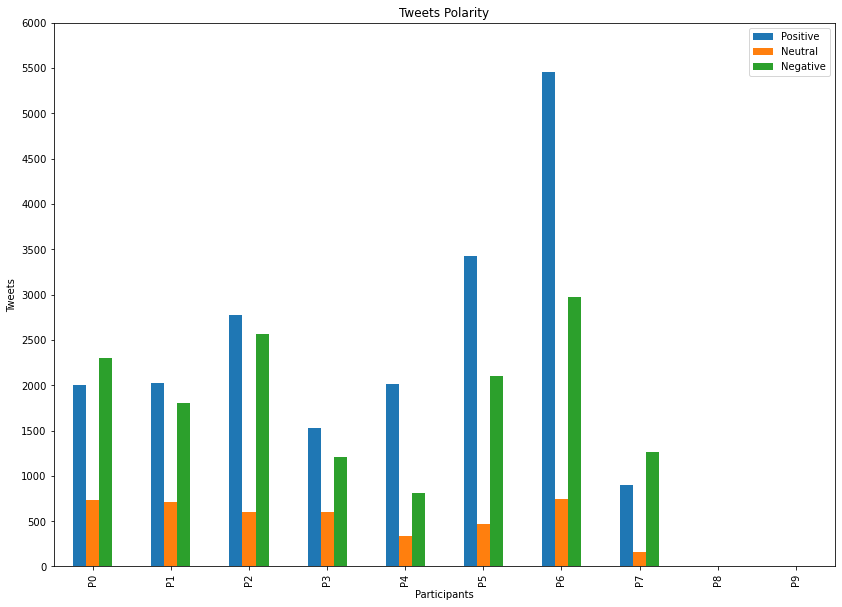

In [8]:
# multiple line plots

bar_chart_data = []

y_range = range(0,6001, 500)

for i in df_chart.index:
    d = ['P{}'.format(i), df_chart.iloc[i]['pos'], df_chart.iloc[i]['neu'], df_chart.iloc[i]['neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","pos","neu","neg"])
df.plot(yticks = y_range, x="Participant", y=["pos", "neu", "neg"], kind="bar",figsize=(14,10))

plt.legend(["Positive", "Neutral", "Negative"])
plt.title('Tweets Polarity')
plt.xlabel('Participants')
plt.ylabel('Tweets')

plt.show()

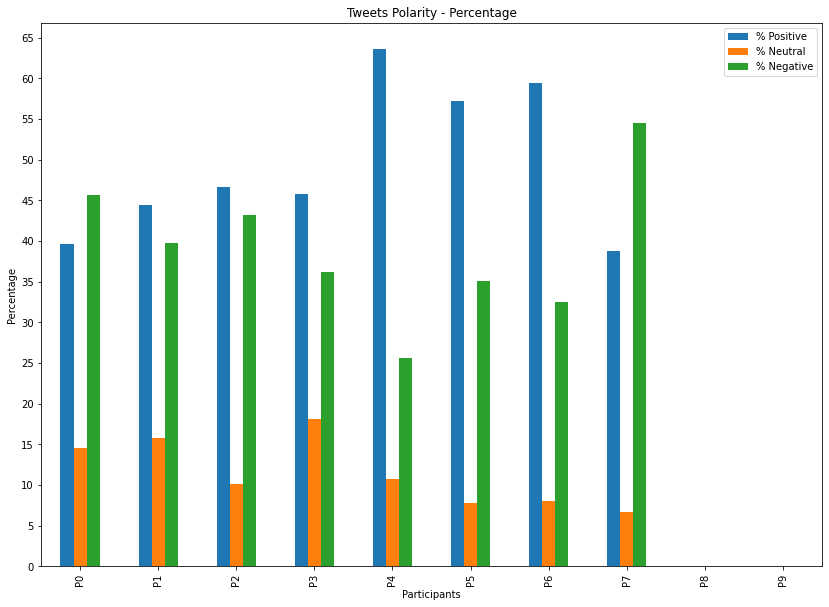

In [9]:
# multiple line plots

bar_chart_data = []

y_range = range(0, 70, 5)

for i in df_chart.index:
    d = ['P{}'.format(i), df_chart.iloc[i]['por_pos'], df_chart.iloc[i]['por_neu'], df_chart.iloc[i]['por_neg']]
    bar_chart_data.append(d)

df = pd.DataFrame(bar_chart_data, columns=["Participant","por_pos","por_neu","por_neg"])
df.plot(yticks = y_range, x="Participant", y=["por_pos", "por_neu", "por_neg"], kind="bar",figsize=(14,10))


plt.legend(['% Positive', '% Neutral', '% Negative'])
plt.title('Tweets Polarity - Percentage')
plt.xlabel('Participants')
plt.ylabel('Percentage')

plt.show()